## Kütüphanelerin eklenmesi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords  
from nltk.stem import WordNetLemmatizer

from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hrnal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hrnal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Verilerin eklenmesi

In [2]:
fake_df=pd.read_csv("Fake.csv")
true_df=pd.read_csv("True.csv")

## Veriler hakkında bilgi

In [3]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [4]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


## Verilerin satırlarının gösterilmesi

In [5]:
fake_df.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true_df.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Test ve eğitim modelinde kullanılması için yeni sütünlar eklenip değer verilmesi

In [7]:
true_df['target']=1
fake_df['target']=0

In [8]:
true_df.shape, fake_df.shape

((21417, 5), (23481, 5))

## Modeli manuel test edebilmek için iki veriden de değeler alınması ve normal veriden ayrılması

In [9]:
true_df_manual=true_df.tail(10)
for i in range(21416,21406,-1):
    true_df.drop([i],axis=0,inplace=True)

fake_df_manual=fake_df.tail(10)
for i in range(23480,23470,-1):
    fake_df.drop([i],axis=0,inplace=True)


In [10]:
true_df.shape, fake_df.shape

((21407, 5), (23471, 5))

## Manuel test için kullanılacak verilerin gösterilmesi

In [11]:
fake_df_manual.head(10)

,title,text,subject,date,target
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [12]:
true_df_manual.head(10)

,title,text,subject,date,target
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [13]:
df_manual=pd.concat([true_df_manual,fake_df_manual])

## Verilerin birleştirilmesi

In [14]:
df_merge=pd.concat([true_df,fake_df])
df_merge.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


## Verilerin  karıştırılması

In [15]:
df_shuffled = df_merge.sample(frac=1, random_state=42).reset_index(drop=True)
df_shuffled.head()

,title,text,subject,date,target
0,Details of first Putin-Trump meeting not yet s...,MOSCOW (Reuters) - Russia and the United State...,politicsNews,"July 3, 2017",1
1,HEY CNN…REMEMBER OBAMA’S Notorious “Friday Nig...,Republican Rep. Steve King: The base is going ...,left-news,"Aug 26, 2017",0
2,Liberia's ruling party backs challenge to pres...,"MONROVIA (Reuters) - Liberia s ruling party, w...",worldnews,"October 29, 2017",1
3,Trade in focus at hearing for Trump's nominee ...,WASHINGTON (Reuters) - U.S. senators stressed ...,worldnews,"October 3, 2017",1
4,WHY ARE GOOGLE AND FACEBOOK ATTENDING BILDERBE...,"Why are banking powerhouses, European Prime Mi...",Government News,"Jun 9, 2015",0


## Tekrar eden verilerin kaldırılması

In [16]:
df_shuffled.drop_duplicates(inplace = True)
df_shuffled.reset_index(drop=True)
df=df_shuffled.copy()

## Veri Görselleştirme

### Count Plot

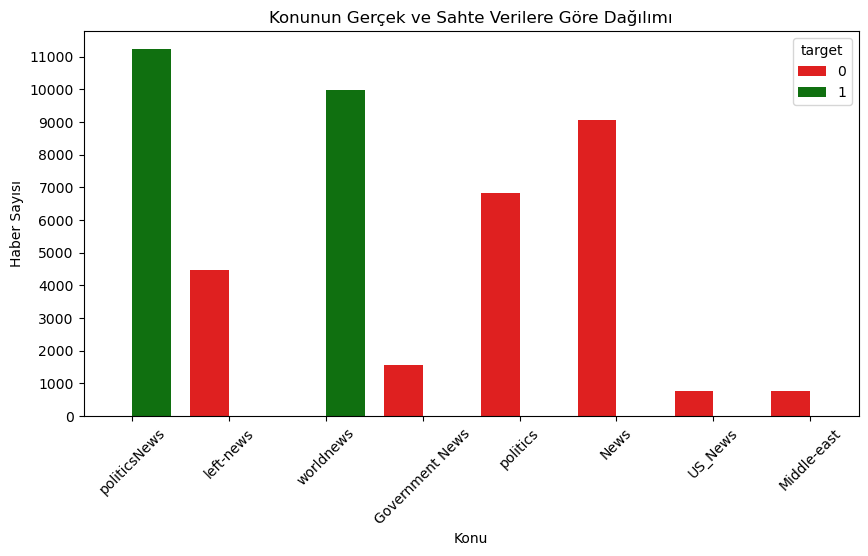

In [17]:
plt.figure(figsize=(10, 5))
ax=sns.countplot(x="subject",  hue='target', data=df, palette=["red", "green"])

plt.title("Konunun Gerçek ve Sahte Verilere Göre Dağılımı")
plt.xlabel("Konu")
plt.ylabel("Haber Sayısı")
plt.xticks(rotation=45)
plt.yticks(range(0,(len(df['target'])+1)//4,1000))

plt.show()

### Line Plot

In [18]:
patternDel = "http"
filter1 = df['date'].str.contains(patternDel)
df = df[~filter1]

pattern = "Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec"
filter2 = df['date'].str.contains(pattern)
df=df[filter2]

df['date'] = pd.to_datetime(df['date'],format='mixed')

In [19]:
df_1=df[df['target']==1]
df_1=df_1.groupby(['date'])['target'].count()
df_1=pd.DataFrame(df_1)
df_1.head()

,target
date,
2016-01-13,30
2016-01-14,15
2016-01-15,23
2016-01-16,5
2016-01-17,3


In [20]:
df_0=df[df['target']==0]
df_0=df_0.groupby(['date'])['target'].count()
df_0=pd.DataFrame(df_0)

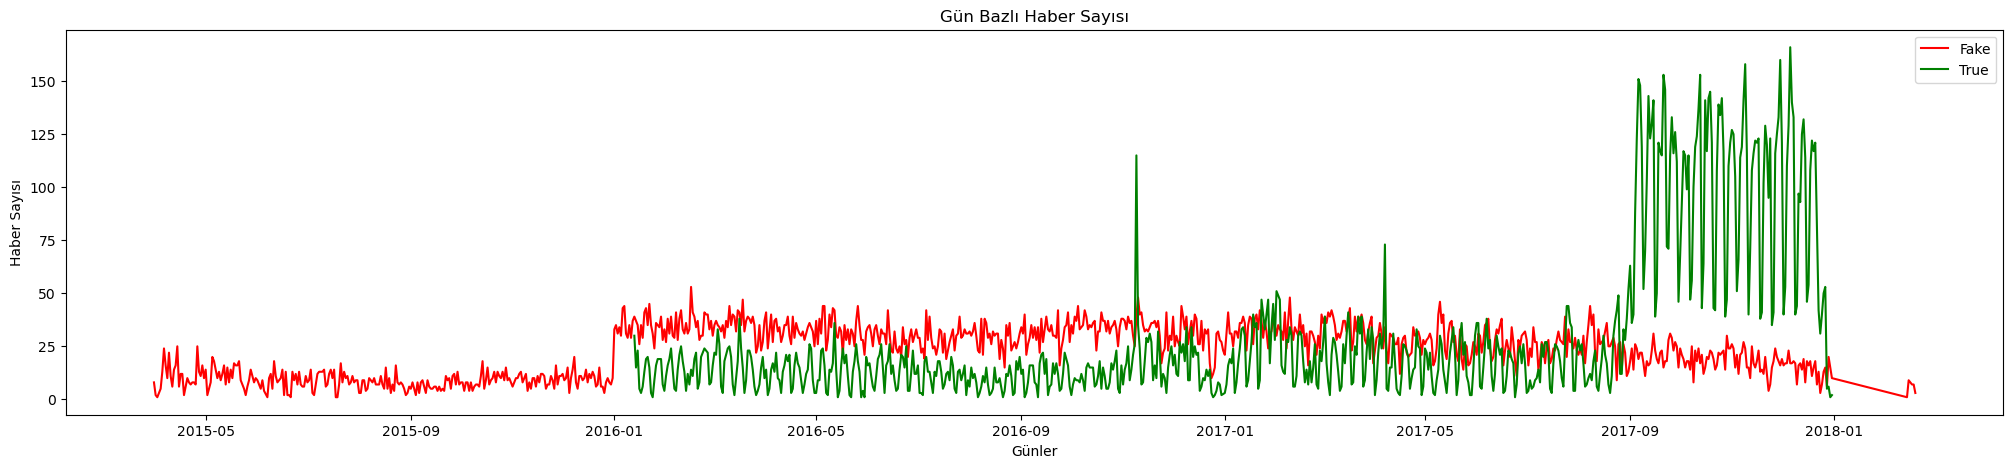

In [21]:
plt.figure(figsize=(25,5))

plt.plot(df_0.index, df_0['target'], label='Fake',color="red")
plt.plot(df_1.index, df_1['target'], label='True',color="green")

plt.title('Gün Bazlı Haber Sayısı')
plt.ylabel('Haber Sayısı')
plt.xlabel('Günler')

plt.legend()

plt.show()

### Sub Plot

In [22]:
df_1=df[df['target']==1]
df_1=df_1.groupby(['date'])

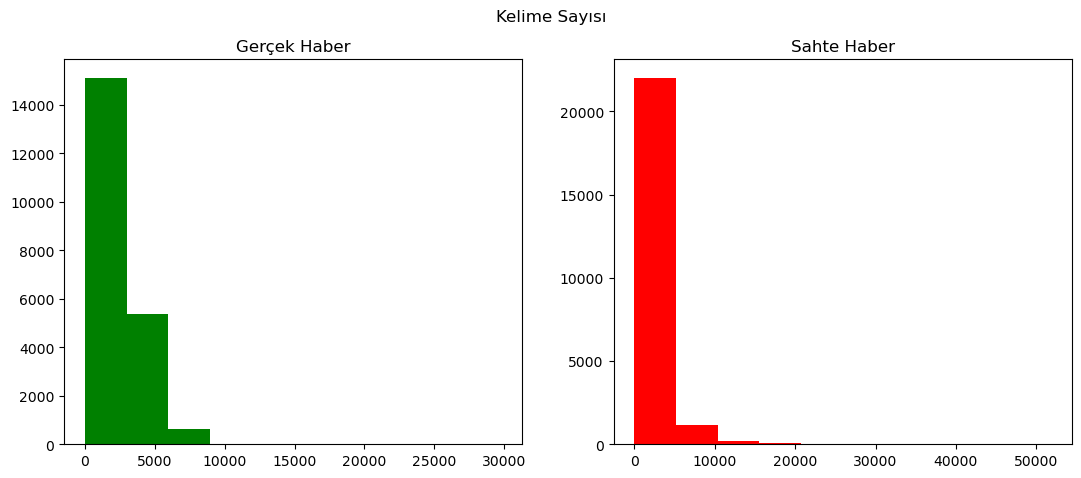

In [23]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

text_len=df[df['target']==1]['text'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Gerçek Haber')

text_len=df[df['target']==0]['text'].str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Sahte Haber')

fig.suptitle('Kelime Sayısı')

plt.show()

In [24]:
df=df_shuffled.copy()

## Veri Temizleme

In [25]:
df['text']= df['subject'] + " " + df['title'] + " " + df['text']
df_manual['text']= df_manual['subject'] + " " + df_manual['title'] + " " + df_manual['text']
del df['title']
del df['subject']
del df['date']
del df_manual['title']
del df_manual['subject']
del df_manual['date']
df.head()

,text,target
0,politicsNews Details of first Putin-Trump meet...,1
1,left-news HEY CNN…REMEMBER OBAMA’S Notorious “...,0
2,worldnews Liberia's ruling party backs challen...,1
3,worldnews Trade in focus at hearing for Trump'...,1
4,Government News WHY ARE GOOGLE AND FACEBOOK AT...,0


In [26]:
text=df.text[7821]
text

'News  Caught On Camera: Devastating Moment 2100 People Find Out Job Outsourced (VIDEO) Some companies definitely prefer increased profit over principle and, clearly, patriotism. Yet another U.S. company, this time Carrier, decided that they would be relocating their Indianapolis, IN, plant to Monterrey, Mexico. This relocation will, in turn, put 2,100 people out of work come 2017.The company, of course, in a state-run by a supposed business friendly Republican, Gov. Mike Pence, is blaming regulations and the high cost to run business here at home. In a statement put out by HVAC Systems and Services North America president Chris Nelson: This move is intended to address the challenges we continue to face in a rapidly changing HVAC industry, with the continued migration of the HVAC industry to Mexico, including our suppliers and competitors, and ongoing cost and pricing pressures driven, in part, by new regulatory requirements, Relocating our operations to a region where we have existing

In [27]:
!pip install bs4
from bs4 import BeautifulSoup

In [28]:
soup = BeautifulSoup(text, "html.parser")
text = soup.get_text()
text

'News  Caught On Camera: Devastating Moment 2100 People Find Out Job Outsourced (VIDEO) Some companies definitely prefer increased profit over principle and, clearly, patriotism. Yet another U.S. company, this time Carrier, decided that they would be relocating their Indianapolis, IN, plant to Monterrey, Mexico. This relocation will, in turn, put 2,100 people out of work come 2017.The company, of course, in a state-run by a supposed business friendly Republican, Gov. Mike Pence, is blaming regulations and the high cost to run business here at home. In a statement put out by HVAC Systems and Services North America president Chris Nelson: This move is intended to address the challenges we continue to face in a rapidly changing HVAC industry, with the continued migration of the HVAC industry to Mexico, including our suppliers and competitors, and ongoing cost and pricing pressures driven, in part, by new regulatory requirements, Relocating our operations to a region where we have existing

In [29]:
text = re.sub('\[[^]]*\]', ' ', text )
text = re.sub(r'<script\b[^>]*>.*?</script>', '', text)
text = re.sub('[^a-zA-Z]',' ',text )

text = text.lower()
text 

'news  caught on camera  devastating moment      people find out job outsourced  video  some companies definitely prefer increased profit over principle and  clearly  patriotism  yet another u s  company  this time carrier  decided that they would be relocating their indianapolis  in  plant to monterrey  mexico  this relocation will  in turn  put       people out of work come      the company  of course  in a state run by a supposed business friendly republican  gov  mike pence  is blaming regulations and the high cost to run business here at home  in a statement put out by hvac systems and services north america president chris nelson  this move is intended to address the challenges we continue to face in a rapidly changing hvac industry  with the continued migration of the hvac industry to mexico  including our suppliers and competitors  and ongoing cost and pricing pressures driven  in part  by new regulatory requirements  relocating our operations to a region where we have existing

In [30]:
text = nltk.word_tokenize(text)
stopwords = set(stopwords.words('english'))
text = [ word for word in text if not word in stopwords]

In [31]:
lemmatizer = nltk.WordNetLemmatizer()
text = [ lemmatizer.lemmatize(word) for word in text] 
text = " ".join(text)
text

'news caught camera devastating moment people find job outsourced video company definitely prefer increased profit principle clearly patriotism yet another u company time carrier decided would relocating indianapolis plant monterrey mexico relocation turn put people work come company course state run supposed business friendly republican gov mike penny blaming regulation high cost run business home statement put hvac system service north america president chris nelson move intended address challenge continue face rapidly changing hvac industry continued migration hvac industry mexico including supplier competitor ongoing cost pricing pressure driven part new regulatory requirement relocating operation region existing infrastructure strong supplier base allow u operate cost effectively continue produce high quality hvac product competitively positioned continuing meet customer need nelson trying heart failing miserably also said decision difficult recognize impact employee family commun

In [32]:
from nltk.corpus import stopwords

def clean(text):
    
    text = re.sub(r'\[[^]]*\]', ' ', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'<script\b[^>]*>.*?</script>', '', text)

    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    stopwordss = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    text = " ".join(lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text.lower()) if word not in stopwordss)

    return text

df['text'] = df['text'].apply(clean)

## WordCloud

In [33]:
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

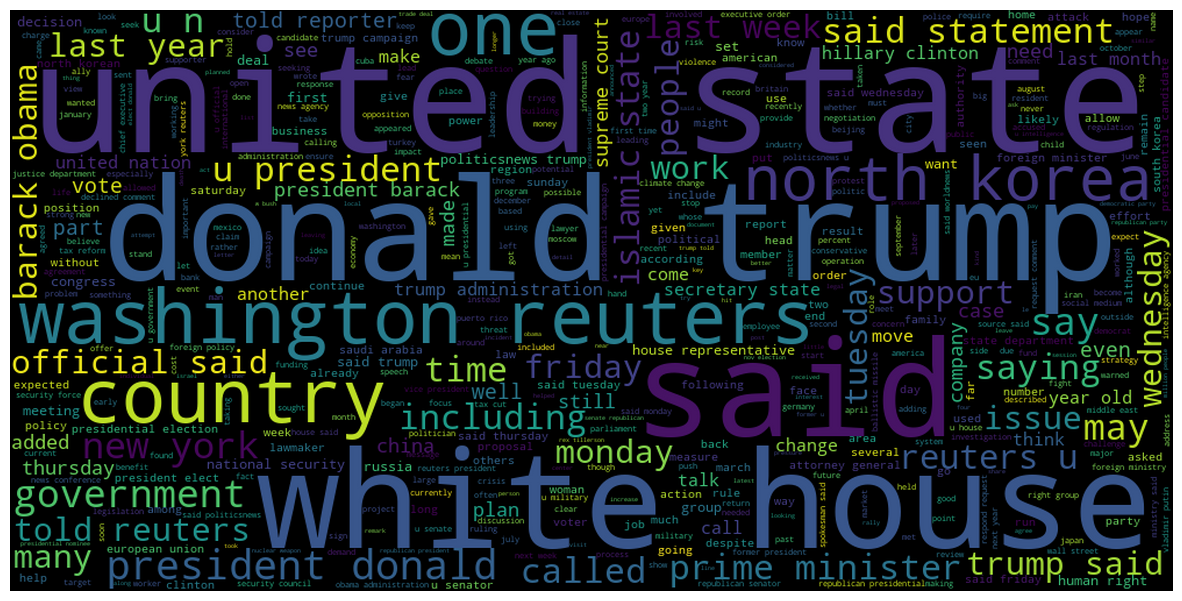

In [34]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(df[df.target == 1].text))
plt.axis("off")
plt.imshow(wc , interpolation = 'spline36');

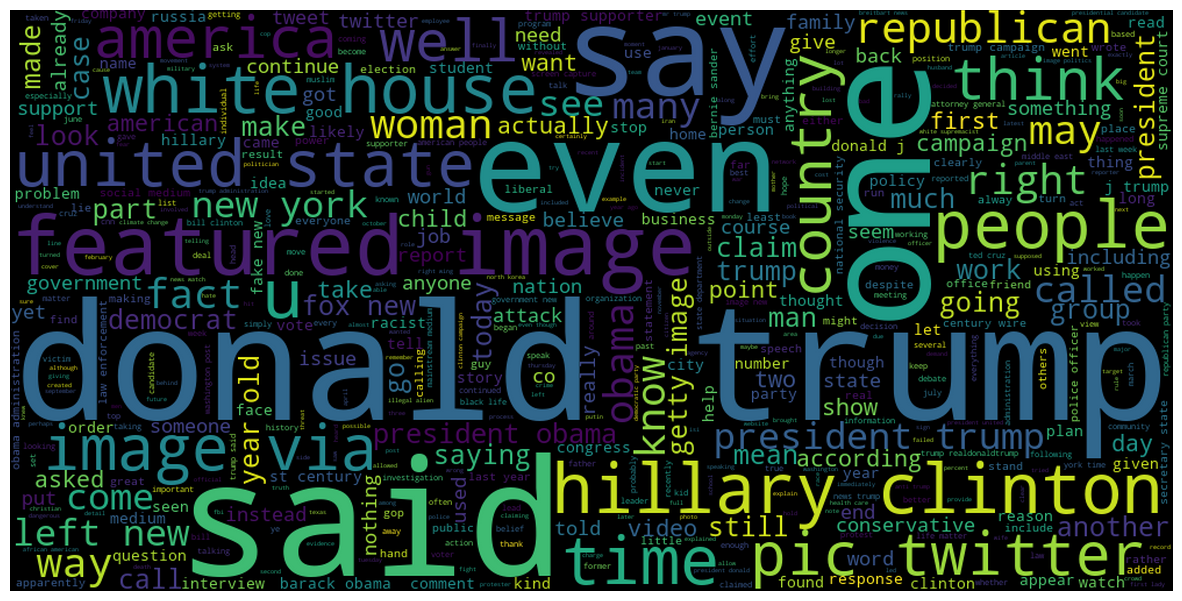

In [35]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(df[df.target == 0].text))
plt.axis("off")
plt.imshow(wc , interpolation = 'spline36');

## N-gram

In [36]:
texts = ' '.join(df['text'])
words = texts.split(" ")

In [37]:
def draw_n_gram(words, i):
    n_grams = list(nltk.ngrams(words, i))
    n_gram_count = pd.Series(n_grams).value_counts()[:15]
    n_gram_df = pd.DataFrame({'kelime sayısı': n_gram_count})
    n_gram_df['kelime'] = n_gram_df.index.map(lambda x: ' '.join(x))
    
    plt.figure(figsize=(15, 8))
    ax = sns.barplot(x='kelime sayısı', y='kelime', hue='kelime sayısı', data=n_gram_df)

    plt.show()

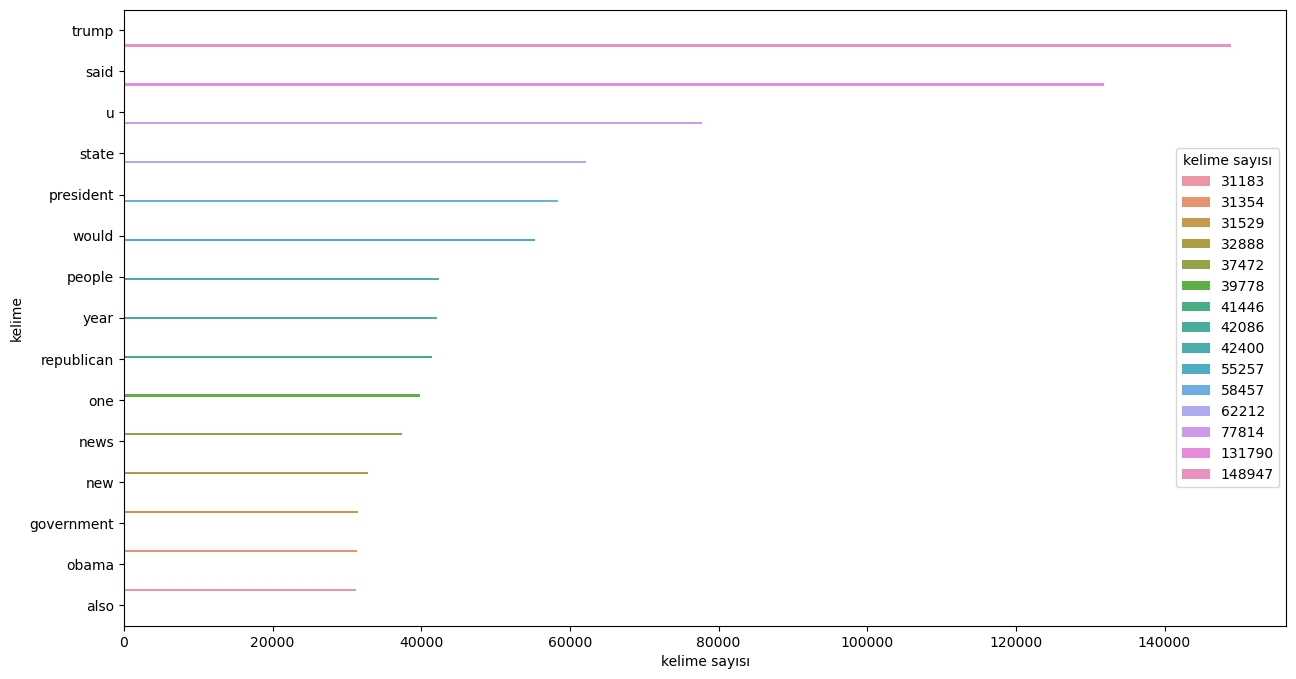

In [38]:
draw_n_gram(words,1)

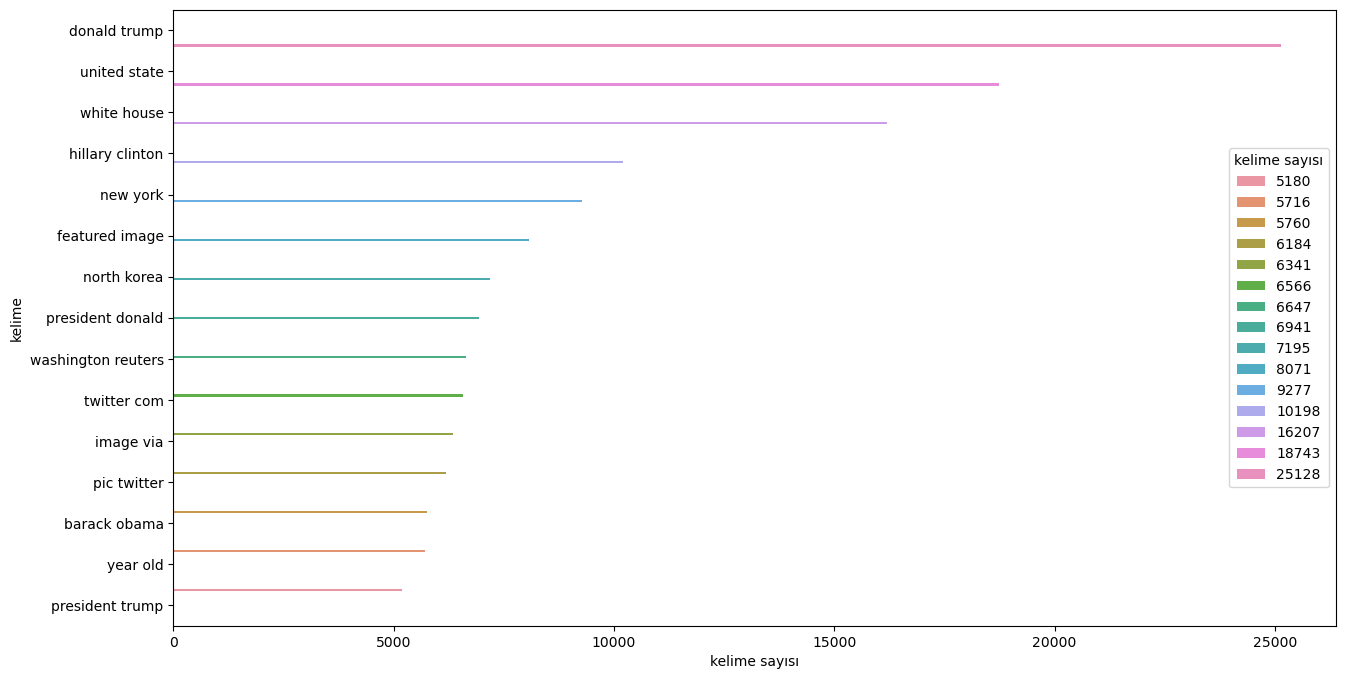

In [39]:
draw_n_gram(words,2)

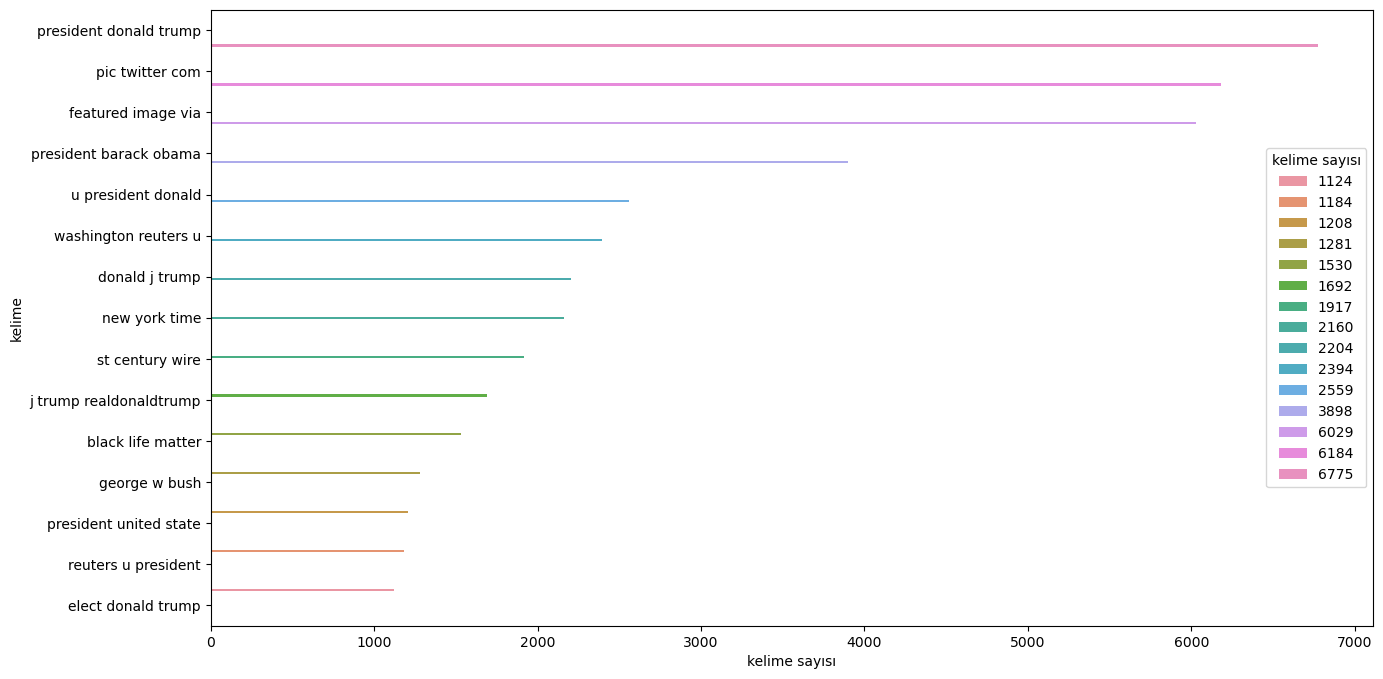

In [40]:
draw_n_gram(words,3)

## LSTM

In [41]:
X=df['text']
y=df['target']

### Eğitim ve test setlerini ayırma

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

### Tokenize Etme ve Pad Etme

In [43]:
max_words = 20000
textlen = 650

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer


tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = sequence.pad_sequences(tokenized_train, maxlen=textlen)

tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=textlen)

### LSTM Model

In [45]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=300, input_length=textlen))
model.add(LSTM(units=100))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test),workers=11)

Epoch 1/10
140/140 [==============================] - 198s 1s/step - loss: 0.0064 - accuracy: 0.9977 - val_loss: 0.0136 - val_accuracy: 0.9965
Epoch 2/10
140/140 [==============================] - 203s 1s/step - loss: 7.1751e-04 - accuracy: 0.9998 - val_loss: 0.0100 - val_accuracy: 0.9978
Epoch 3/10
140/140 [==============================] - 202s 1s/step - loss: 1.8868e-04 - accuracy: 0.9999 - val_loss: 0.0115 - val_accuracy: 0.9981
Epoch 4/10
140/140 [==============================] - 206s 1s/step - loss: 3.2854e-04 - accuracy: 0.9999 - val_loss: 0.0116 - val_accuracy: 0.9980
Epoch 5/10
140/140 [==============================] - 205s 1s/step - loss: 1.0756e-04 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 0.9979
Epoch 6/10
140/140 [==============================] - 198s 1s/step - loss: 1.2872e-04 - accuracy: 0.9999 - val_loss: 0.0150 - val_accuracy: 0.9972
Epoch 7/10
140/140 [==============================] - 203s 1s/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0143 - 

In [48]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test kaybı: {loss:.4f}, Test Doğruluğu: {accuracy:.4f}')

280/280 [==============================] - 25s 90ms/step - loss: 0.0129 - accuracy: 0.9972
Test kaybı: 0.0129, Test Doğruluğu: 0.9972


### LSTM Model Manuel Test

In [49]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
def lstm_manual_test(haber):
    
    cleaned_haber = clean(haber)
    tokenized_haber = tokenizer.texts_to_sequences([cleaned_haber])
    padded_haber = pad_sequences(tokenized_haber, maxlen=model.input_shape[1])

    
    prediction = model.predict(padded_haber)

    print("\nLSTM Model Tahmini: %.5f" %  (prediction))

    
haber = input("Test verisini girin: ")


lstm_manual_test(haber)


Test verisini girin:  worldnews mata pires owner embattled brazil builder oas dy sao paulo reuters cesar mata pires owner co founder brazilian engineering conglomerate oas sa one largest company involved brazil corruption scandal died tuesday mata pires died heart attack taking morning walk upscale district paulo oas based person direct knowledge matter said effort contact family unsuccessful oas declined comment son wealthy cattle rancher northeastern state bahia mata pires link politician central expansion oas became brazil builder earlier decade people familiar career told reuters last year big break came befriended antonio carlos magalh e popular politician bahia governor several time eventually married daughter tereza brazilian joked oas stood obras arranjadas pelo sogro work arranged father law year steady growth triggered flurry massive government contract oas ensnared operation car wash unearthed illegal contracting ring state firm builder ensuing scandal helped topple former b

1/1 [==============================] - 0s 436ms/step

LSTM Model Tahmini: 0.99925


In [50]:
haber = input("Test verisini girin: ")
lstm_manual_test(haber)

Test verisini girin:  middle east hillary clinton israel first peace middle east robert fantina counterpunchalthough united state still ten month next exercise electoral futility poll indicate former secretary state hillary clinton anxious see runaway victory candidacy good sign despite fact real contrasting opponent democratic side coronation expected going happen one might say writer focus much mr clinton adoration israel looking comment apartheid nation one get clear view broader troubling perspective mr clinton seems hold january opinion piece appeared jewish journal written mr clinton fawning maudlin essay typical writing anyone seeking national political office u know must pay homage israeli lord master point essay tell much mr clinton especially concerned new wave violence inside israel brutal stabbings shooting vehicle attack seek sow fear among innocent number palestinian killed west bank alone settler iof israel occupation force terrorist ten year high mr clinton especially c

1/1 [==============================] - 0s 37ms/step

LSTM Model Tahmini: 0.00000


In [51]:
haber = input("Test verisini girin: ")
lstm_manual_test(haber)

Test verisini girin:  middle east u navy sailor held iranian military sign neocon political stunt st century wire say wire predicted new year look ahead new hostage crisis underway today iranian military force report two small riverine u navy boat seized iranian water currently held iran farsi island persian gulf total u navy personnel nine men one woman detained iranian authority navy strayed u navy patrol boat persian gulf image source usni according pentagon initial narrative follows sailor training mission around noon et boat experienced mechanical difficulty drifted iranian claimed water detained iranian coast guard official added story since slightly revised white house spokesman josh earnest follow narrative boat traveling en route kuwait bahrain stopped detained iranian according usni search rescue team harry truman strike group scrambled aid crew stopped short crew taken iranian contact iran received assurance crew vessel returned promptly pentagon spokesman peter cook told ap

1/1 [==============================] - 0s 37ms/step

LSTM Model Tahmini: 0.00001
